# Model Benchmarking

This notebook will perform exploration via model and model hyperparameter searching of possible shallow models using SKLearn built in algorithms.

I use data constructed by Feature_Engineering.ipynb and model searching functionality from SKL_search.py 

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
import warnings
from SKL_search import *
warnings.filterwarnings("ignore")

In [75]:
#untie local dependency
import os
cwd = os.getcwd().split('\\')
local_repo_path = '\\'.join(cwd[:-1])
raw_data_path = local_repo_path + r'\data\raw'
processed_data_path = local_repo_path + '\data\processed'
feature_path = local_repo_path + r'\\data\\features'

# Choose and load feature set to benchmark

In [76]:
output_feature_fname = 'raw'
sj_feature_train = pd.read_csv(feature_path + r'\\sj_train_' + output_feature_fname + '.csv', index_col=0)
sj_feature_test = pd.read_csv(feature_path + r'\\sj_test_' + output_feature_fname + '.csv', index_col=0)
iq_feature_train = pd.read_csv(feature_path + r'\\iq_train_' + output_feature_fname + '.csv', index_col=0)
iq_feature_test = pd.read_csv(feature_path + r'\\iq_test_' + output_feature_fname + '.csv', index_col=0)

In [77]:
from sklearn.model_selection import train_test_split
X_tr_sj, X_val_sj, Y_tr_sj, Y_val_sj = train_test_split(sj_feature_train.drop('total_cases', axis = 1), sj_feature_train['total_cases'], test_size = 0.05, random_state = 4)
X_tr_iq, X_val_iq, Y_tr_iq, Y_val_iq = train_test_split(iq_feature_train.drop('total_cases', axis = 1), iq_feature_train['total_cases'], test_size = 0.05, random_state = 4)

In [78]:
X_tr_sj.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
703,0.000000,1.041197,-0.558771,-0.568926,1.132833,0.477651,0.446927,0.215749,0.60,0.000000,0.556964,-0.119269,1.132833,0.244758,1.288136,0.067381,0.398671,0.500000,-0.272727,1.565141
618,1.231243,1.098662,1.419293,1.135343,-0.414904,-0.648319,-0.677840,-0.870244,-0.85,-0.904762,-0.799424,-0.793755,-0.414904,-0.845553,0.971751,-0.612557,0.186047,-0.772727,-1.000000,-0.403169
490,-0.099943,-0.303611,-0.107336,-0.064591,0.793128,0.726635,0.655493,0.537422,1.00,0.666667,1.664361,0.255446,0.793128,0.580787,-0.384181,0.643185,1.116279,1.227273,0.500000,0.737676
214,0.285028,0.017141,-1.623504,-1.484848,0.408323,0.045438,0.081937,0.076376,-0.10,0.238095,0.003650,0.371820,0.408323,0.070440,0.022599,0.434916,0.810631,0.500000,0.227273,1.737676
759,-2.824151,-1.691607,0.464721,1.481727,-0.414904,-0.231622,-0.249534,-0.666202,-0.60,0.047619,-0.718348,-1.041127,-0.414904,-0.640537,-0.542373,-0.673813,-0.292359,-1.272727,-0.772727,-0.360915


In [79]:
X_tr_iq.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
25,0.009583,-0.568236,-0.141054,0.330199,-1.217574,1.663594,1.510102,-2.432264,1.176357,0.752941,-0.886629,-2.973828,-1.217574,-2.059079,1.107178,0.675826,0.837627,0.625000,-0.214286,-0.730681
138,0.282340,0.026771,-0.194292,-0.457345,1.542160,0.978802,0.728147,0.296975,0.433499,0.658824,0.149719,-0.478131,1.542160,0.303388,0.037365,1.887947,0.309172,0.625000,1.142857,-0.730681
365,0.484626,0.350501,0.041785,0.737053,-0.897505,-0.288479,-0.065086,-0.975252,-0.052215,-1.082353,-0.727823,-0.736413,-0.897505,-0.975500,0.521141,-0.788821,-0.093267,-0.812500,-1.000000,0.097169
506,0.020225,0.595573,0.428261,0.276292,-0.198215,0.755760,0.615365,0.885060,0.233499,0.752941,3.639550,0.217320,-0.198215,0.947698,-0.261554,-0.064915,-0.601397,0.312500,-0.214286,-0.424637
413,0.250054,0.270963,-0.031519,0.244894,-1.016025,-1.061751,-0.929748,-0.995784,-0.366501,-2.258824,-0.730852,-0.202986,-1.016025,-0.994961,0.088496,0.000000,0.000000,0.002841,-2.500000,-0.632747


# Benchmark SJ city

# SKLearn broad model search

In [80]:
from sklearn.ensemble import (ExtraTreesRegressor, RandomForestRegressor, 
                              AdaBoostRegressor, GradientBoostingRegressor)
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

In [81]:
models1 = { 
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR()
    #'NNRegressor': neighbors.KNeighborsRegressor()
}

params1 = {  
    'RandomForestRegressor': { 'n_estimators': [100,100], 'max_depth':[5,10]},
    'GradientBoostingRegressor': { 'n_estimators': [50, 100,150], 'max_features': ['sqrt','log2'] },
    'SVR': [
        {'kernel': ['linear'], 'C': [0.05, 0.01], 'degree':[1], 'epsilon':[0.2, 0.5, 1]}],
    'LinearRegression': {'n_jobs':[-1]}
    #'NNRegressor': {'n_neighbors':[125]}
    
}

In [82]:
sj_helper = EstimatorSelectionHelper(models1, params1)
sj_helper.fit(X_tr_sj, Y_tr_sj, scoring='neg_mean_absolute_error', cv = 2)

Running GridSearchCV for RandomForestRegressor.
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    1.6s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    2.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.4s finished


Running GridSearchCV for GradientBoostingRegressor.
Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.9s finished


Running GridSearchCV for SVR.
Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:    1.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.9s finished


In [83]:
sj_skl_models = sj_helper.score_summary(sort_by='min_score')
sj_skl_models

,estimator,min_score,mean_score,max_score,std_score,C,degree,epsilon,kernel,max_depth,max_features,n_estimators
12,SVR,-24.3796,-24.2135,-24.0475,0.166048,0.05,1,1,linear,NaN,NaN,NaN
11,SVR,-24.4156,-24.2315,-24.0475,0.184083,0.05,1,0.5,linear,NaN,NaN,NaN
10,SVR,-24.4172,-24.2232,-24.0292,0.19396,0.05,1,0.2,linear,NaN,NaN,NaN
13,SVR,-24.6677,-24.5049,-24.3421,0.16279,0.01,1,0.2,linear,NaN,NaN,NaN
14,SVR,-24.67,-24.5053,-24.3406,0.164671,0.01,1,0.5,linear,NaN,NaN,NaN
15,SVR,-24.6834,-24.5073,-24.3313,0.176048,0.01,1,1,linear,NaN,NaN,NaN
8,GradientBoostingRegressor,-29.7251,-28.0852,-26.4454,1.63987,NaN,NaN,NaN,NaN,NaN,log2,100
4,GradientBoostingRegressor,-29.8972,-28.188,-26.4787,1.70929,NaN,NaN,NaN,NaN,NaN,sqrt,50
6,GradientBoostingRegressor,-30.3491,-28.8197,-27.2903,1.52938,NaN,NaN,NaN,NaN,NaN,sqrt,150
1,RandomForestRegressor,-30.5087,-28.5267,-26.5448,1.98198,NaN,NaN,NaN,NaN,5,NaN,100


In [84]:
def fit_and_predict(train, test, mod):
    mod.fit(train.drop('total_cases', axis = 1), train['total_cases'])
    test_preds = mod.predict(test.drop(['city', 'year', 'weekofyear'], axis = 1))
    train_preds = mod.predict(train.drop('total_cases', axis = 1))
    fig, ax = plt.subplots(figsize = (20,10))
    train_error = np.round(mean_absolute_error(train_preds, train['total_cases']),1)
    pd.DataFrame(train['total_cases']).reset_index(drop = True).plot(ax = ax)
    pd.DataFrame(test_preds).set_index(np.arange(len(train), len(train)+ len(test_preds))).plot(ax = ax)
    pd.DataFrame(train_preds).plot(ax = ax)
    ax.legend(labels = ['True', 'Predicted', 'Fitted'])
    ax.set_title('Mean train error: ' + str(train_error))
    return(mod, train_preds, test_preds)

In [98]:
SVR_mod = SVR(C = 0.05, degree = 1, epsilon = 0.2, kernel = 'linear')
GB_mod = GradientBoostingRegressor(n_estimators = 35, max_depth = 7, max_features = 'sqrt')
RF_mod = RandomForestRegressor(n_estimators = 50, max_depth = 10, max_features = 'sqrt')
NN_mod = neighbors.KNeighborsRegressor(n_neighbors = 2)
MLP_NN = MLPRegressor((100,100), max_iter = 10000,learning_rate = 'invscaling', activation = 'relu')

# Fit and predict with Gradient Boosted Regressor for sj

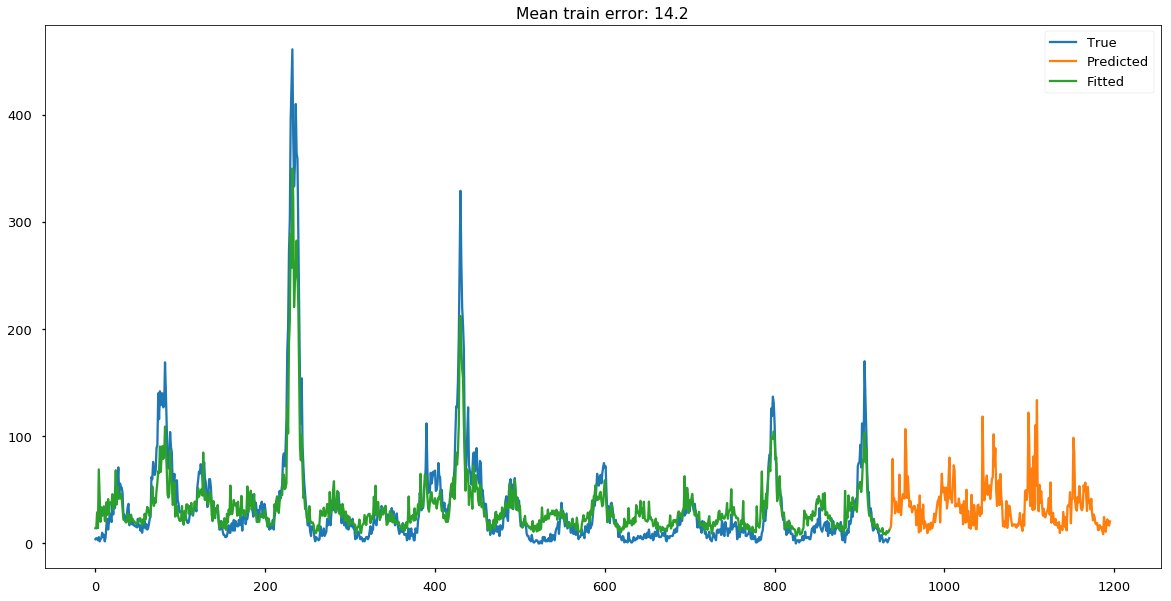

In [99]:
sj_GB_mod, sj_GB_fitted_vals, sj_GB_test_preds = fit_and_predict(sj_feature_train, sj_feature_test, RF_mod)

# Fit and predict with Gradient Boosted Regressor for iq

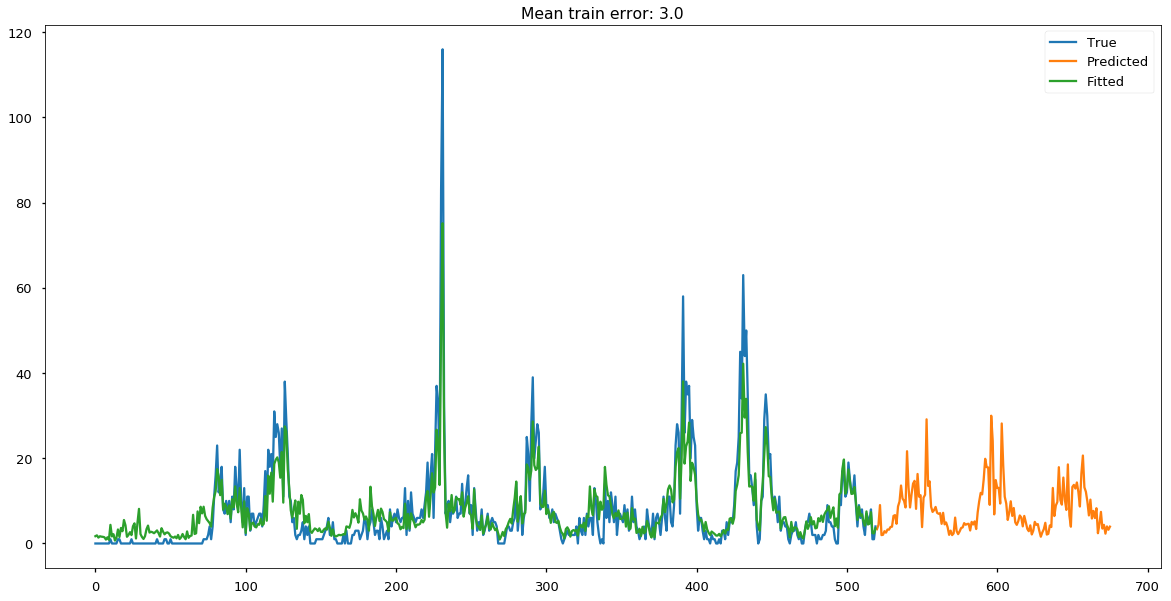

In [72]:
iq_GB_mod, iq_GB_fitted_vals, iq_GB_test_preds = fit_and_predict(iq_feature_train, iq_feature_test, RF_mod)

# Fit and predict with SVR for sj

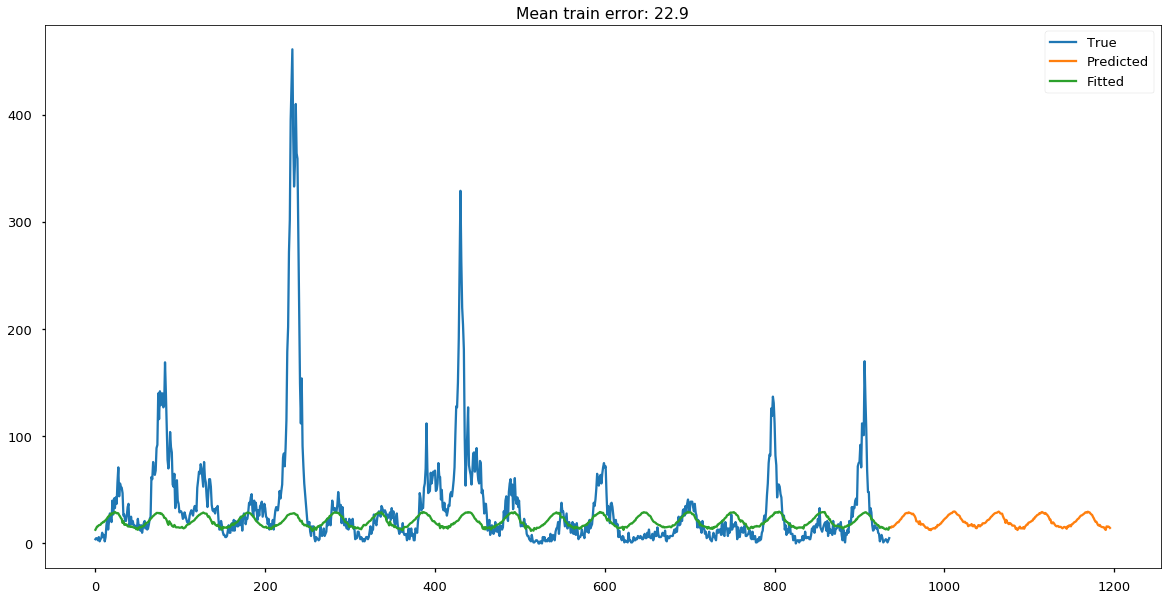

In [73]:
sj_SVR_mod, sj_SVR_fitted_vals, sj_SVR_test_preds = fit_and_predict(sj_feature_train, sj_feature_test, SVR_mod)

# Fit and predict with SVR for iq

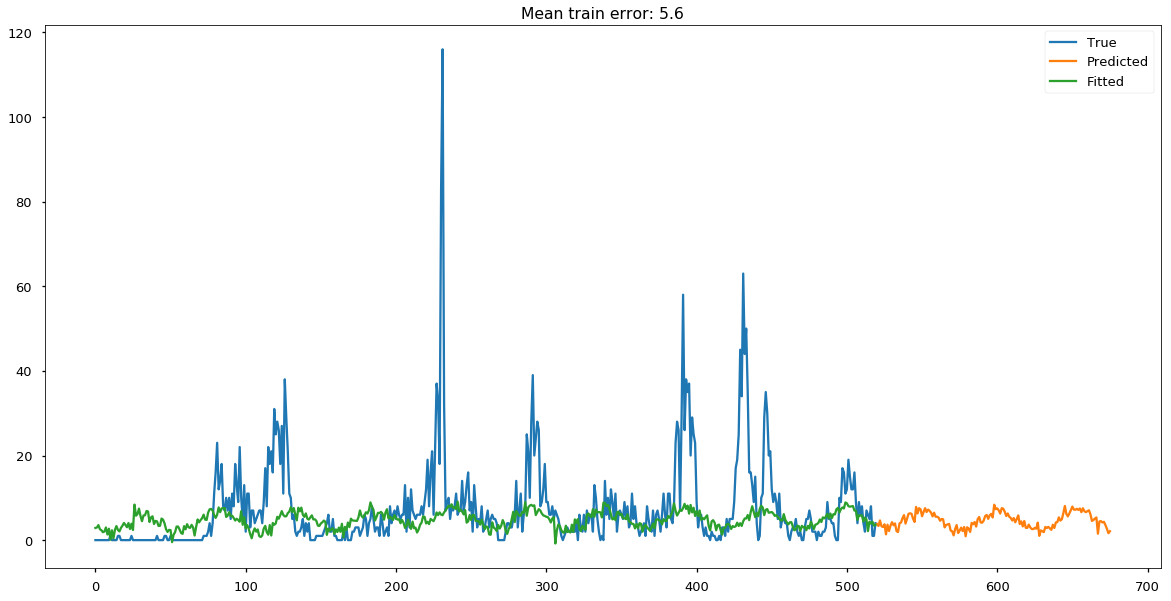

In [52]:
iq_SVR_mod, iq_SVR_fitted_vals, iq_SVR_test_preds = fit_and_predict(iq_feature_train, iq_feature_test, SVR_mod)

# Poisson Regression using Statsmodels

# Negative Binomial GLM using Statsmodels

In [53]:
import statsmodels.api as sm
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

In [54]:
X_tr_sj.columns = [str(i) if not i.isdigit() else str('Num') + str(i) for i in list(X_tr_sj.columns)]
X_val_sj.columns = [str(i) if not i.isdigit() else str('Num') + str(i) for i in list(X_tr_sj.columns)]
sj_feature_test.columns = [str(i) if not i.isdigit() else str('Num') + str(i) for i in list(sj_feature_test.columns)]

In [55]:
formula = ' + '.join([str(i) if not i.isdigit() else str('Num') + str(i) for i in list(X_tr_sj.columns)])
formula = 'y ~ ' + formula
X_tr_sj['y'] = Y_tr_sj
X_val_sj['y'] = Y_val_sj

In [56]:
model = smf.glm(formula=formula,
                data=X_tr_sj,
                family=sm.families.NegativeBinomial(alpha = 1e-8))
model = model.fit()

predictions_sj = model.predict(X_val_sj).astype(int)
print ("cv error:", mean_absolute_error(predictions_sj, Y_val_sj))

pred_train_sj = model.predict(X_tr_sj).astype(int)
print ("train error:", mean_absolute_error(pred_train_sj, Y_tr_sj))

cv error: 22.72340425531915
train error: 23.39482564679415


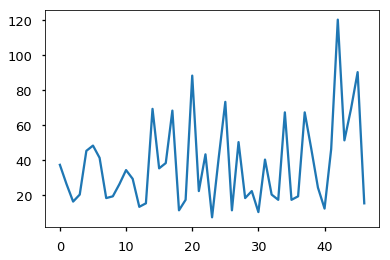

In [57]:
plt.plot(np.arange(predictions_sj.shape[0]),predictions_sj)